# preprocessing and EDA Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
kidney_data = pd.read_csv("kidney_disease_dataset.csv")

# Display basic information about the dataset
kidney_data.info()
kidney_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          972 non-null    int64  
 1   Age                 972 non-null    int64  
 2   Gender              972 non-null    object 
 3   Serum_Creatinine    972 non-null    float64
 4   Blood_Pressure      972 non-null    int64  
 5   Diabetes            972 non-null    int64  
 6   Days_In_Hospital    972 non-null    int64  
 7   Received_Treatment  972 non-null    int64  
 8   City                972 non-null    object 
 9   Deaths              972 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 76.1+ KB


,Patient_ID,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
0,1,57,Female,0.7,134,0,9,0,Pune,1
1,2,79,Female,0.7,143,0,19,1,Mumbai,1
2,3,77,Male,0.9,133,0,1,0,Pune,1
3,4,67,Female,1.7,117,0,10,0,Kolkata,1
4,5,90,Male,0.9,149,1,7,0,Ahmedabad,1


In [2]:
# Check for missing values
missing_values = kidney_data.isnull().sum()

# Display missing values per column
print(missing_values)


Patient_ID            0
Age                   0
Gender                0
Serum_Creatinine      0
Blood_Pressure        0
Diabetes              0
Days_In_Hospital      0
Received_Treatment    0
City                  0
Deaths                0
dtype: int64


In [3]:
# Drop 'Patient_ID' column
kidney_data_cleaned = kidney_data.drop(columns=['Patient_ID'], errors='ignore')

# Display dataset structure after dropping
kidney_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 972 non-null    int64  
 1   Gender              972 non-null    object 
 2   Serum_Creatinine    972 non-null    float64
 3   Blood_Pressure      972 non-null    int64  
 4   Diabetes            972 non-null    int64  
 5   Days_In_Hospital    972 non-null    int64  
 6   Received_Treatment  972 non-null    int64  
 7   City                972 non-null    object 
 8   Deaths              972 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 68.5+ KB


In [4]:
# Convert 'Gender' and 'City' to categorical codes
kidney_data_cleaned['Gender'] = kidney_data_cleaned['Gender'].astype('category').cat.codes
kidney_data_cleaned['City'] = kidney_data_cleaned['City'].astype('category').cat.codes

# Display dataset info after encoding
kidney_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 972 non-null    int64  
 1   Gender              972 non-null    int8   
 2   Serum_Creatinine    972 non-null    float64
 3   Blood_Pressure      972 non-null    int64  
 4   Diabetes            972 non-null    int64  
 5   Days_In_Hospital    972 non-null    int64  
 6   Received_Treatment  972 non-null    int64  
 7   City                972 non-null    int8   
 8   Deaths              972 non-null    int64  
dtypes: float64(1), int64(6), int8(2)
memory usage: 55.2 KB


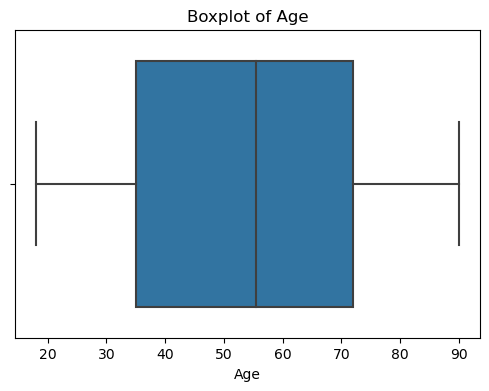

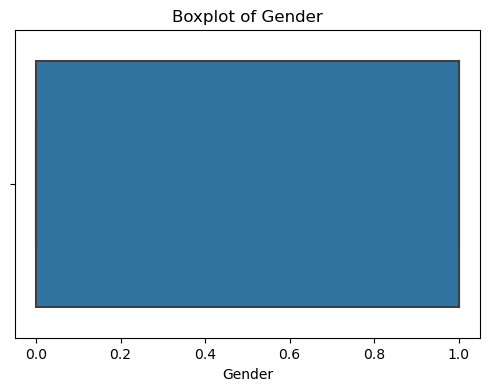

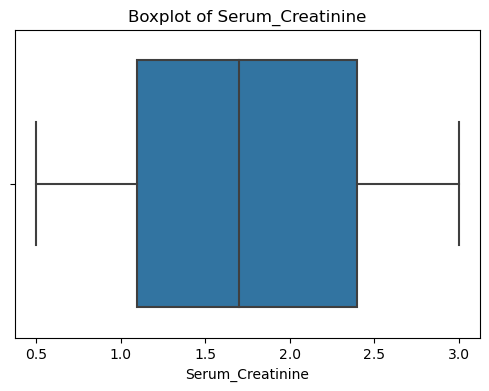

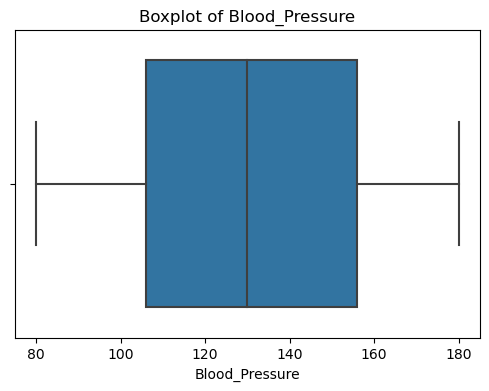

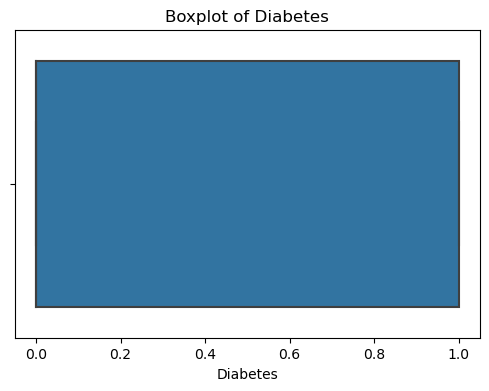

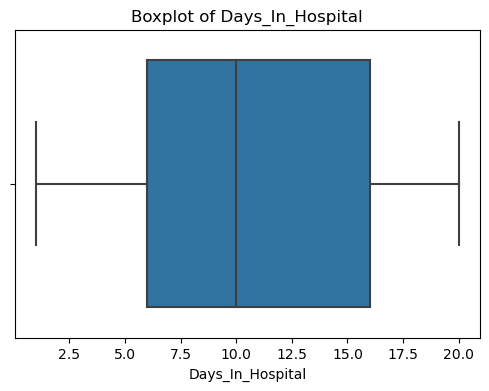

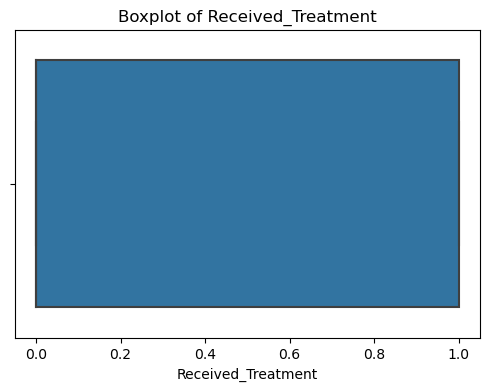

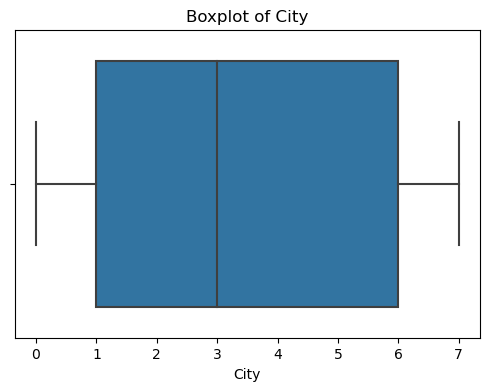

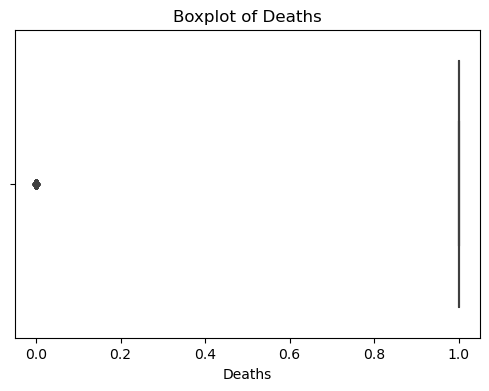

In [5]:
# Identify numerical columns
numerical_columns = kidney_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=kidney_data_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [6]:
def remove_outliers(df, column):
    """
    Remove outliers from a specified numerical column using the IQR method.

    Parameters:
    df (pd.DataFrame): The dataset.
    column (str): The column name.

    Returns:
    pd.DataFrame: The dataset with outliers removed for the specified column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to specific numerical columns
columns_to_clean = ['Serum_Creatinine', 'Blood_Pressure', 'Days_In_Hospital']
for col in columns_to_clean:
    kidney_data_cleaned = remove_outliers(kidney_data_cleaned, col)

# Display updated dataset shape after outlier removal
kidney_data_cleaned.shape


(972, 9)

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling (excluding binary categorical columns)
scaling_columns = ['Age', 'Serum_Creatinine', 'Blood_Pressure', 'Days_In_Hospital']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
kidney_data_cleaned[scaling_columns] = scaler.fit_transform(kidney_data_cleaned[scaling_columns])

# Display summary statistics after scaling
kidney_data_cleaned[scaling_columns].describe()


,Age,Serum_Creatinine,Blood_Pressure,Days_In_Hospital
count,972.000000,972.000000,972.000000,972.000000
mean,0.503658,0.501811,0.503961,0.506389
std,0.293695,0.289251,0.292571,0.298651
min,0.000000,0.000000,0.000000,0.000000
25%,0.236111,0.240000,0.260000,0.263158
50%,0.520833,0.480000,0.500000,0.473684
75%,0.750000,0.760000,0.760000,0.789474
max,1.000000,1.000000,1.000000,1.000000


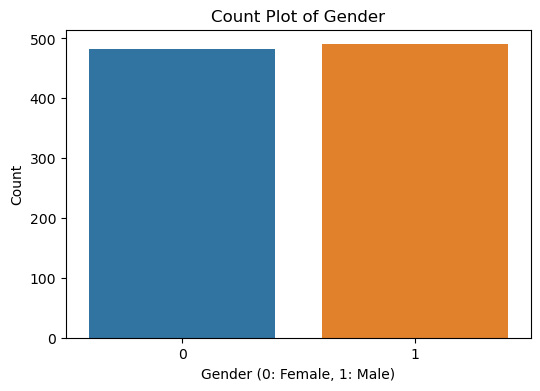

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=kidney_data_cleaned["Gender"])
plt.title("Count Plot of Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()


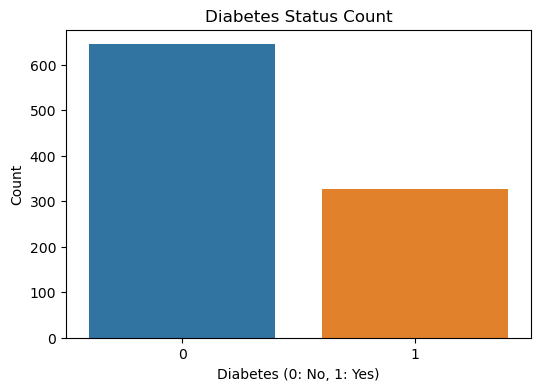

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=kidney_data_cleaned["Diabetes"])
plt.title("Diabetes Status Count")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


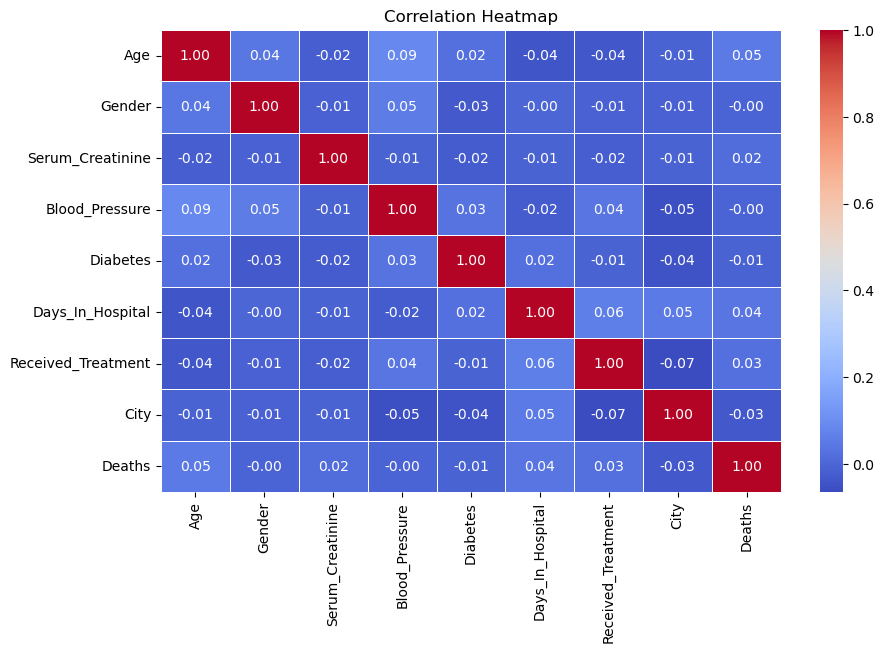

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(kidney_data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Train and split dataset

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target
X = kidney_data_cleaned.drop(columns=['Deaths'])
y = kidney_data_cleaned['Deaths']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models Implementation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, class_weight='balanced', eval_metric='logloss')
}

# Train and evaluate
metrics = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n {name} ")
    print(classification_report(y_test, y_pred, zero_division=0))
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })



 Logistic Regression 
              precision    recall  f1-score   support

           0       0.16      0.60      0.25        25
           1       0.90      0.54      0.68       170

    accuracy                           0.55       195
   macro avg       0.53      0.57      0.47       195
weighted avg       0.81      0.55      0.62       195


 Random Forest 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.87      1.00      0.93       170

    accuracy                           0.87       195
   macro avg       0.44      0.50      0.47       195
weighted avg       0.76      0.87      0.81       195


 XGBoost 
              precision    recall  f1-score   support

           0       0.50      0.12      0.19        25
           1       0.88      0.98      0.93       170

    accuracy                           0.87       195
   macro avg       0.69      0.55      0.56       195
weighted avg       0.83

# model evaluation


In [14]:
import pandas as pd

# Tabular comparison of results
results_df = pd.DataFrame(metrics)
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.548718   0.901961  0.541176  0.676471
1        Random Forest  0.871795   0.871795  1.000000  0.931507
2              XGBoost  0.871795   0.883598  0.982353  0.930362


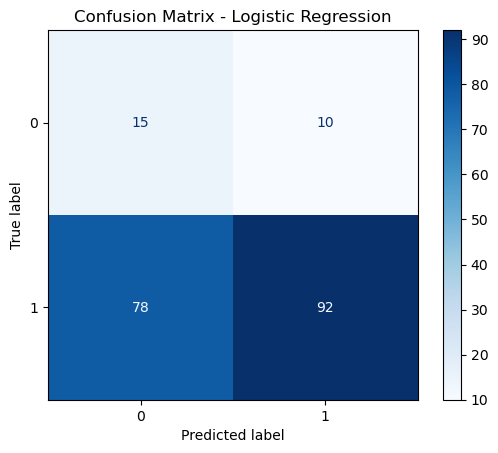

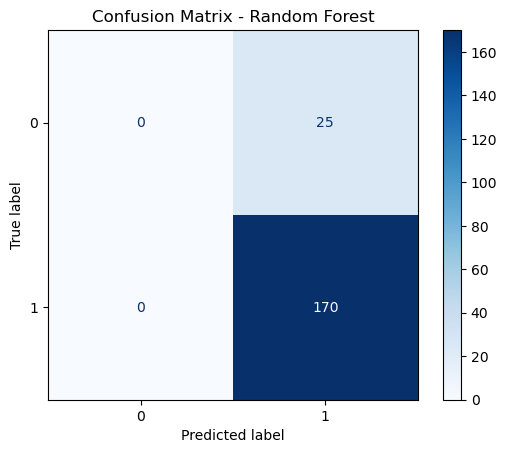

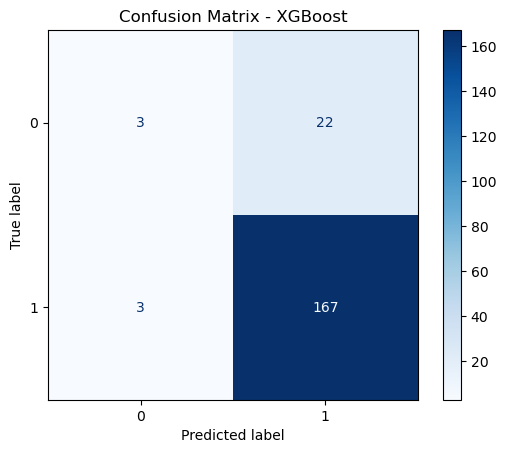

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


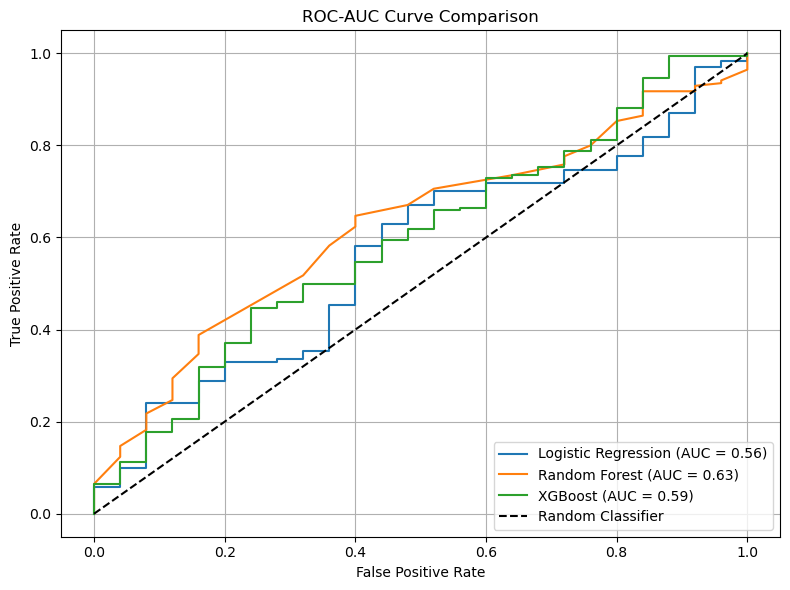

In [16]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_probs = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
logreg = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_params, scoring='f1', cv=5)
logreg_grid.fit(X_train_scaled, y_train)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, scoring='f1', cv=5)
rf_grid.fit(X_train_scaled, y_train)

# XGBoost
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5)
xgb_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]},
             scoring='f1')

In [18]:
print("Best Logistic Regression:", logreg_grid.best_params_)
print("Best F1 Score:", logreg_grid.best_score_)

print("\nBest Random Forest:", rf_grid.best_params_)
print("Best F1 Score:", rf_grid.best_score_)

print("\nBest XGBoost:", xgb_grid.best_params_)
print("Best F1 Score:", xgb_grid.best_score_)


Best Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.9102387851831883

Best Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.9102387851831883

Best XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.9102387851831883


In [20]:
import joblib

# Save trained models
joblib.dump(models['Logistic Regression'], 'logistic_regression_model.pkl')
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['XGBoost'], 'xgboost_model.pkl')



['xgboost_model.pkl']

In [21]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('random_forest_model.pkl') 


# Format: [Age, Gender, Serum_Creatinine, Blood_Pressure, Diabetes, Days_In_Hospital, Received_Treatment, City]
# Example values 
# Age = 60 years
# Gender = 1 (Male), 0 = Female
# Serum_Creatinine = 1.2 (mg/dL)
# Blood_Pressure = 130 (mmHg)
# Diabetes = 1 (Yes)
# Days_In_Hospital = 10
# Received_Treatment = 1 (Yes)
# City = 2 (e.g., Mumbai = 1, Pune = 0, etc.)

sample = np.array([[60, 1, 1.2, 130, 1, 10, 1, 2]])

# Predict using the model
prediction = model.predict(sample)

# Output result
print("Prediction:", "Death" if prediction[0] == 1 else "Survived")


Prediction: Death
